### Objectives:

- To study the joint behavior of two random variables by ploting a 2D scatter plot and a contour plot of the 2D Gaussian distribution.
- To build a threshold classifier on one feature (one random variable), perform pattern recoginition, and evaluate the performance of the classifier.
- To build a threshold classifier on two features (two random variables), perform pattern recoginition, and evaluate the performance of the classifier.

In this lab, we will look at how python can be used to analyze data using the pandas data analysis package, how we can model data using probability distributions studied in class, and perform pattern recognition.

We will be using a data file that has been obtained from https://www.kaggle.com/mustafaali96/weight-height. This dataset has 10,000 rows and 3 columns named “Gender”, “Height” and “Weight”. Each row provides the gender, height and weight of a person. Height is given in inches and weight in pounds.

In this problem, we extract two smaller datasets from this dataset: "train_data" and "test_data". 

We will use the "train_data" dataset to visualize the joint behavior of the two random variables, height and weight, by plotting a 2D scatter plot and a contour plot of the 2D Gaussian distribution fit to this dataset. We will also visualize the conditional distributions of height and weight given gender. By analyzing the empirical distributions of the Height and Weight, we will build threshold classifiers that compares either the height or the weight to a fixed threshold to classify an entry as being either "Male" or "Female."

We will evaluate the performance of the classifiers on the "test_data" dataset. We compare the classification results with the "ground truth" labels contained in the Gender column to compute the empirical classification accuracy. The reason we use a separate dataset to evaluate the performance is that this better reflects the actual performance of the classifier in the field, where it will encounter new people, not previously seen during training.

Finally, we will build a threshold classifier that acts on a linear combination of the two features (e.g., the height and the weight), and compare its performance with the classifiers based on height or weight alone. 

Download the file "Lab5_Weight_height.csv" from the course website to complete the lab. 

We recommend you to use the pandas package, numpy package and the scipy and matplotlib.pyplot libraries in python, as you have done in previous labs.

For more information about pandas, please see https://pandas.pydata.org/ 

After you have completed the notebook, export it as pdf for submission. Go to File, click Download as, click HTML (.html), then convert the html file to pdf file.

We first load all the packages we need for this homework.

In [1]:
# load pandas, a data analysis package
# load numpy, a scientific computing package
# load scipy.stats, a module contains probability functions
# load matplotlib.pyplot, a framework provides a Matlab-like plotting
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

In [2]:
# threshold classifier
def threshold_classifier(feature, threshold):
    # if feature value is greater than the threshlod, classify to Male. Otherwise, Female
    output = np.where(feature>=threshold, 'Male', 'Female')
    return output

In [3]:
# compare the two sets of labels
def compare_labels(testlabel, ground_truth): #Compare Test label with actual label
    correct = np.where(testlabel==ground_truth,1, 0)
    accuracy = sum(correct)/np.size(correct)
    return accuracy

Below, we load the datafile using **pandas.read_csv** function into a **pandas.DataFrame**. We then create two subsets, "train_data" and "test_data" of size "n_train" and "n_test".  The datasets should have an equal number of males and females, so the number of data in each dataset should be even.

In [4]:
# read data
raw_data = pd.read_csv('Lab5_Weight_height.csv')

# sizes of smaller datasets
n_test = 800
n_train = 1600

# constructing the train and test datasets
# note the first 5000 rows of raw_data are males and the last 5000 are females.
test_data = pd.concat([ raw_data[0:(n_test//2)], raw_data[5000:(5000+n_test//2)] ]) #Get 400M and 400F for test
train_data = pd.concat([ raw_data[n_test//2:(n_test//2+n_train//2)], \
                       raw_data[(5000+n_test//2) : (5000+n_test//2+n_train//2)] ]) #Then get 800M and 800F for test

train_data

,Gender,Height,Weight
400,Male,69.970904,202.863293
401,Male,65.313462,163.357332
402,Male,71.906005,217.027715
403,Male,66.233904,183.161232
404,Male,65.814943,166.583611
...,...,...,...
6195,Female,66.066489,158.503983
6196,Female,59.830264,99.724742
6197,Female,64.007838,135.667416
6198,Female,64.110915,134.164839


Below, we visualize the joint behavior of two random variables by plotting a 2D scatter plot of height and weight.

We plot the 2D scatter plots using ax.scatter.

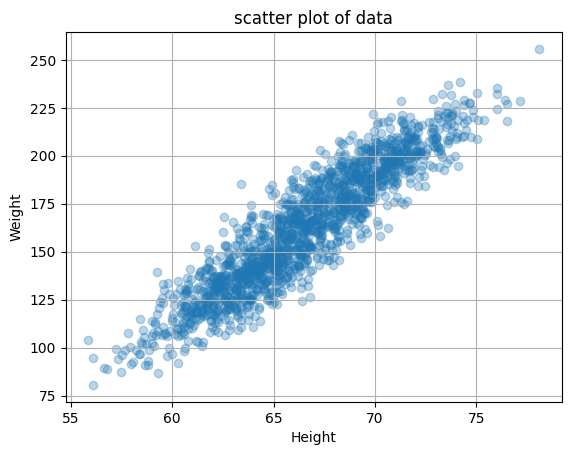

In [5]:
# create figure
fig, ax = plt.subplots()

# create scatter plot
ax.scatter(train_data['Height'], train_data['Weight'], alpha=0.3)

plt.xlabel('Height')
plt.ylabel('Weight')
plt.grid(True)
ax.set_title('scatter plot of data')

plt.show()#plot the scatter-gram

We start by modelling the joint distribution of height and weight using a 2D Gaussian distribution $f_{X,Y}(x,y)$ with mean vector $m$ and covariance matrix $C$, where $X$ and $Y$ are the height and weight of a person, respectively.

The code below estimates the mean and covariance that best fit the data using the **pandas.DataFrame.mean** and **pandas.DataFrame.cov** functions

In [6]:
# Compute the mean vector, covariance matrix, and the correlation coefficient matrix
m = train_data[['Height','Weight']].mean() # m =[m_x1,m_x2]
C = train_data[['Height','Weight']].cov()  # C =[[sd_x1^2, rhox1*sd_x2*sd_x1],[rhox1*sd_x2*sd_x1],sd_x1^2]
rho = train_data[['Height','Weight']].corr(method = 'pearson') #rho = [ [rho_xx, rho_yx], [rho_xy rho_yy]

print('The mean vector of height and weight is\n')
print(m)

print('\nThe covariance matrix of height and weight is\n')
print(C)

print('\nThe correlation coefficient matrix of height and weight is\n')
print(rho)

The mean vector of height and weight is

Height     66.493410
Weight    162.367104
dtype: float64

The covariance matrix of height and weight is

            Height      Weight
Height   14.367088  109.919064
Weight  109.919064  994.581994

The correlation coefficient matrix of height and weight is

          Height    Weight
Height  1.000000  0.919535
Weight  0.919535  1.000000


The code below overlays a contour plot of the 2D Gaussian that best fits the data onto the scatterplot. 

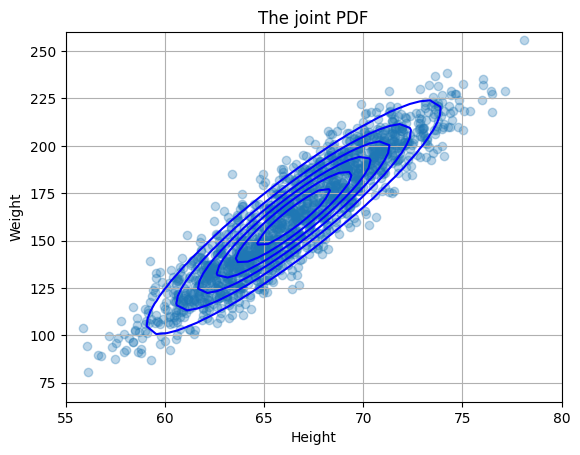

In [7]:
# create a multivariate Gaussian random variable with mean m and covariance matrix C
dist = multivariate_normal(m, C)

# create limits of plot
axlim = [55, 80, 65, 260] #axis limit

# create set of (x,y) positions to compute the pdf at
x, y = np.meshgrid( np.linspace(axlim[0], axlim[1]), np.linspace(axlim[2], axlim[3]) ) #create coordinate gird
pos = np.dstack((x, y))#Convert grid into 3d array

# compute the joint Gaussian pdf
f_XY = dist.pdf(pos) #Transform the 3d array with Gauss Dist

# create the plot
fig, ax = plt.subplots()

# scatter plot
ax.scatter(train_data['Height'], train_data['Weight'], alpha=0.3)

# pdf contour plot
ax.contour(x, y, f_XY, colors='b', alpha = 1) #Contour graph

# set axes and labels
ax.axis(axlim) #set limit of axis
plt.xlabel('Height')
plt.ylabel('Weight')
plt.grid(True)
ax.set_title('The joint PDF')

plt.show()

Now, we generate the scatter plot of height and weight for each gender separately. We separate data into different groups using the **pandas.DataFrame.groupby** command.

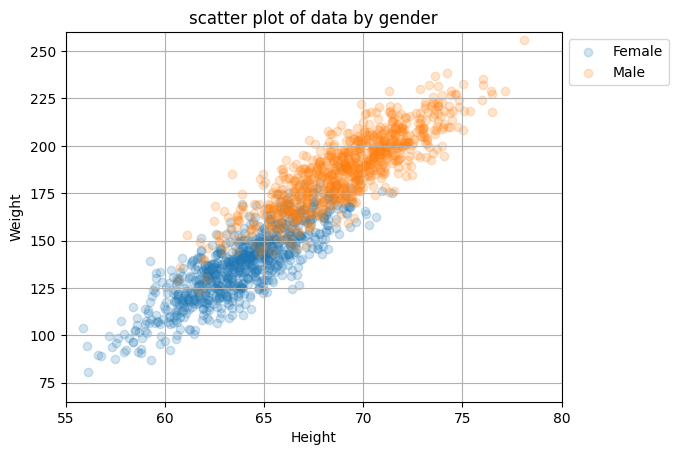

In [8]:
# create figure
fig, ax = plt.subplots()

# create one scatter plot for each gender
for name, groups in train_data.groupby('Gender'): #scatter the data for each gender group
    ax.scatter(x='Height', y='Weight', data = groups, label = name, alpha = 0.2)

# set axes and labels
ax.axis(axlim)
ax.legend(loc = 'upper left', bbox_to_anchor = (1, 1))
plt.xlabel('Height')
plt.ylabel('Weight')
plt.grid(True)
plt.title('scatter plot of data by gender')

plt.show()

We can see from the plot above that males are generally taller and heavier than females. 

Thus, to obtain a simple automatic classifier, we might consider applying a threshold to either the height or the weight. In other words, a person is classified as male if his/her height or weight is larger than a threshold, T, otherwise, the person is classified as a female.

The code below uses the function **threshold_classifier** defined above to implement and test a classifier on the height. This corresponds to drawing a vertical line on the scatter plot at the threshold and classifying everything on the right as male and everything on the left as female. When we choose the threshold to be 70 inches, which is quite tall, most of the females are correctly classified, but quite a few males are classified as female. The code also shows some of the classification results for males and females. 

We use the function **compare_labels** to evaluate the performance of this classifier on the test data by comparing the output of the classifier with the ground truth labels.

The accuracy is the ratio of the correct classifications to the size of the test dataset.

You can try changing the value of the threshold, e.g. to 63, to see what happens to the errors.

Note that thresholding by weight corresponds to drawing a horizontal, rather than vertical line at the threshold. Given the shape of the scatter plot, you might be able to guess which classifier will perform better: one based on thresholding by height or one based on thresholding by weight. 

The accuracy is 0.65


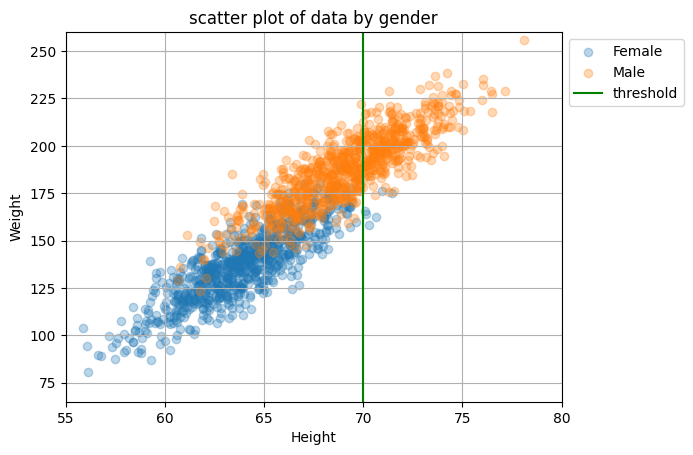

  ground_truth     height classifier output
0         Male  73.847017              Male
1         Male  68.781904            Female
2         Male  74.110105              Male
3         Male  71.730978              Male
4         Male  69.881796            Female
5         Male  67.253016            Female
6         Male  68.785081            Female
7         Male  68.348516            Female
     ground_truth     height classifier output
5392       Female  63.642045            Female
5393       Female  69.825826            Female
5394       Female  60.162510            Female
5395       Female  62.285114            Female
5396       Female  64.328491            Female
5397       Female  62.518234            Female
5398       Female  62.892831            Female
5399       Female  62.396154            Female


In [27]:
# get the ground truth labels
ground_truth = test_data['Gender'].values.tolist() #Get actual labels

# run the threshold classifier
threshold = 70 # choose a threshold for comparison
output = threshold_classifier(test_data['Height'], threshold) #If Height > 70 -> Male

accuracy = compare_labels(output, ground_truth) #Compare the test label with actual labels -> get accuracy
print(f'The accuracy is {accuracy}')



# create figure
fig, ax = plt.subplots()

# create one scatter plot for each gender
for name, groups in train_data.groupby('Gender'):
    ax.scatter(x='Height', y='Weight', data = groups, label = name, alpha = 0.3) #scatter plot the data for each gender group
ax.plot([threshold, threshold],axlim[2:4],'g',label = 'threshold')

# set axes and labels
ax.axis(axlim)
ax.legend(loc = 'upper left', bbox_to_anchor = (1, 1))
plt.xlabel('Height')
plt.ylabel('Weight')
plt.grid(True)
plt.title('scatter plot of data by gender')

plt.show()




#print the result
d = {'ground_truth': ground_truth, 'height': test_data['Height'], 'classifier output': output}
classifier_compare = pd.DataFrame(data = d)
n_print = 8
print(classifier_compare.head(n_print)) #Print first
print(classifier_compare.tail(n_print)) #Pritn Last


### Part a (15 points) : Choosing the threshold

In the code above, the threshold was chosen arbitrarily. Here, you will use probability theory to choose the threshold in a more principled manner based on data in the training set.

To do this, we note that the probability that this classifier makes an error is given by

$
\mathrm{P}[\mathrm{Female\ and\ } X>T] + \mathrm{P}[\mathrm{Male \ and \ } X \leq T] 
= \mathrm{P} [ X > T | \mathrm{Female} ] \mathrm{P} [ \mathrm{Female} ] 
+ \mathrm{P} [ X \leq T | \mathrm{Male} ] \mathrm{P} [ \mathrm{Male} ]
$

Compute the empirical conditional means and standard deviations of the height given the genders Female and Male on the training set.

Plot the probability that this classifier makes an error as a function of $T$ for 50 points ranging from 55 to 80, under the assumption that the conditional probability density functions of the height $X$ given the gender $G$, $f_{X|G}(x|g)$ and $f_{Y|G}(y|g)$ for $g \in \{ \mathrm{Female}, \mathrm{Male} \}$, are given by Gaussian distributions with the conditional means and standard deviations computed empirically from the training dataset. 

Find the optimal value of $T$ (i.e., the value of the threshold at which classifier's error is minimum) and the corresponding probability that this classifier makes an error.

The Conditional Mean of the height given the genders Female is 63.87782977810415
The Conditional Standard Deviation of the height given the genders Female is 2.636045509961953
The Conditional Mean of the height given the genders Male is 69.10898984865746
The Conditional Standard Deviation of the height given the genders Male is 2.846713588281129


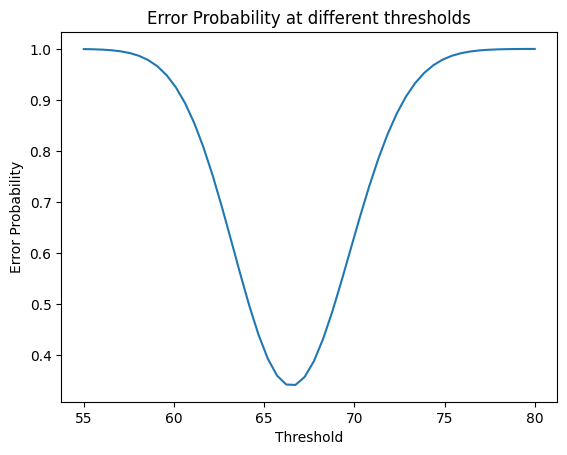

The Optimal thresholds would be T = 66.73469387755102 with error probability = 0.3413605910027403


In [16]:
# put your code below and print out the result after running your code
# =====================================================================
from scipy.stats import norm

means = []
std = []

for name, groups in train_data.groupby('Gender'):
    print(f'The Conditional Mean of the height given the genders {name} is {groups["Height"].mean()}');
    print(f'The Conditional Standard Deviation of the height given the genders {name} is {groups["Height"].std()}');


    means.append(groups["Height"].mean());
    std.append(groups["Height"].std());



thresholds = np.linspace(55,80,50) # 50 points between Height = 55-80

Error = []
for threshold in thresholds:
    Female_error = 1 - norm(loc = means[0], scale = std[0]).cdf(threshold) # P[Female and X > T]
    Male_error = norm(loc = means[1], scale = std[1]).cdf(threshold) #P[Male and X ≤ t]
    Error.append(Female_error + Male_error)


plt.plot(thresholds, Error)
plt.xlabel('Threshold')
plt.ylabel('Error Probability')
plt.title('Error Probability at different thresholds')
plt.show()

Optimal_thresholds = thresholds[np.argmin(Error)]
print(f'The Optimal thresholds would be T = {Optimal_thresholds} with error probability = {np.min(Error)}')



### Part b (7 points):
Use the function **threshold_classifier** defined above to implement and test this new classifier on the height test data. Compute its empirical classficiation accuracy using **compare_labels** (defined above). In other words, compare the classification results with the ground truth, count the number of correct classfication and divided by the number of people, 400.

In [11]:
# put your code below and print out the result after running your code
# =====================================================================

Optimal_output = threshold_classifier(test_data['Height'], Optimal_thresholds) #If Height > 70 -> Male
Optimal_accuracy = compare_labels(Optimal_output, ground_truth) #Compare the test label with actual labels -> get accuracy
print(f'The empirical classification accuracy is {Optimal_accuracy}')

The empirical classification accuracy is 0.8375


Is this classifier's accuracy better than that obtained using an arbitrary threshold = 70?

### Part b Answer: 

Yes, this classifier's accuracy is better than that obtained using an arbitary threshold = 70

Since the accuracy of this classifier = 0.8375 which is > 0.65

### Part c (20 points) : 
Repeat the steps above (**Parts a and b**) for designing a classifier based on weight. Consider thresholds ranging from 75 to 250 pounds.

The Conditional Mean of the weight given the genders Female is 137.21135385892956
The Conditional Standard Deviation of the weight given the genders Female is 18.65467289648864
The Conditional Mean of the weight given the genders Male is 187.52285354891063
The Conditional Standard Deviation of the weight given the genders Male is 19.37019462935534


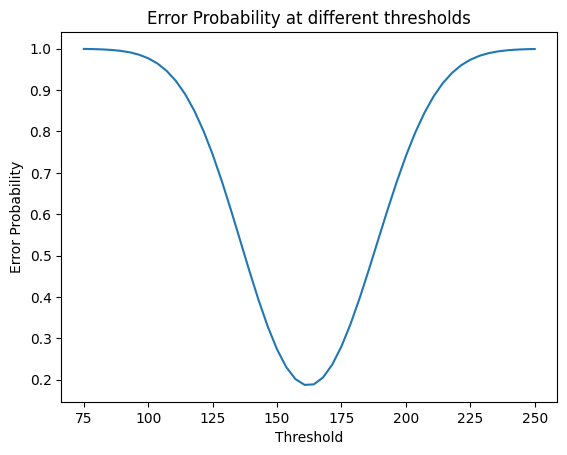

The Optimal thresholds would be T = 160.71428571428572 with error probability = 0.18703109542982604
The empirical classification accuracy is 0.925


In [12]:
# put your code below and print out the result after running your code
# =====================================================================
means = []
std = []

for name, groups in train_data.groupby('Gender'):
    print(f'The Conditional Mean of the weight given the genders {name} is {groups["Weight"].mean()}');
    print(f'The Conditional Standard Deviation of the weight given the genders {name} is {groups["Weight"].std()}');


    means.append(groups["Weight"].mean());
    std.append(groups["Weight"].std());



thresholds = np.linspace(75,250,50) # 50 points between Height = 55-80

Error = []
for threshold in thresholds:
    Female_error = 1 - norm(loc = means[0], scale = std[0]).cdf(threshold) # P[Female and X > T]
    Male_error = norm(loc = means[1], scale = std[1]).cdf(threshold) #P[Male and X ≤ t]
    Error.append(Female_error + Male_error)


plt.plot(thresholds, Error)
plt.xlabel('Threshold')
plt.ylabel('Error Probability')
plt.title('Error Probability at different thresholds')
plt.show()

Optimal_thresholds = thresholds[np.argmin(Error)]
print(f'The Optimal thresholds would be T = {Optimal_thresholds} with error probability = {np.min(Error)}')

Optimal_output = threshold_classifier(test_data['Weight'], Optimal_thresholds) #If Height > 70 -> Male
Optimal_accuracy = compare_labels(Optimal_output, ground_truth) #Compare the test label with actual labels -> get accuracy
print(f'The empirical classification accuracy is {Optimal_accuracy}')


Which feature (height or weight) results in the better performing classifier? And why?

### Part c Answer:
The feature "Weight" results in the better performing classifier

Since the "Weight" Classifier has the accuracy of 0.925 which is greater than that of the "Height" Classifier's accuracy = 0.8375

In [2]:
print("hi")

hi
